**Table of contents**<a id='toc0_'></a>    
- [Parallel Machine Learning Using Dask](#toc1_)    
  - [Overview](#toc1_1_)    
  - [Importing Modules for Parallel Distributed Computing with Dask](#toc1_2_)    
    - [Importing Dask DataFrame](#toc1_2_1_)    
    - [Defining a Function to Print Dask DataFrame Information](#toc1_2_2_)    
      - [Inside the Function:](#toc1_2_2_1_)    
    - [Enhancing Functions with Parallel Execution Information via a Decorator](#toc1_2_3_)    
      - [Import Statements](#toc1_2_3_1_)    
      - [Decorator for Execution Information](#toc1_2_3_2_)    
    - [Practical Use Case](#toc1_2_4_)    
    - [Function for Retrieving **Parallel** Partition Information from a Dask DataFrame](#toc1_2_5_)    
      - [Parameters and Return Value:](#toc1_2_5_1_)    
      - [Core Functionality:](#toc1_2_5_2_)    
      - [Practical Implications:](#toc1_2_5_3_)    
    - [Repartitioning Dask DataFrames/Series for Optimized **Parallel** Processing](#toc1_2_6_)    
      - [Key Features:](#toc1_2_6_1_)    
      - [Parameters:](#toc1_2_6_2_)    
      - [Functionality:](#toc1_2_6_3_)    
      - [Practical Implications:](#toc1_2_6_4_)    
    - [Function for Initializing a **Parallel** Dask Client](#toc1_2_7_)    
      - [Key Parameters:](#toc1_2_7_1_)    
      - [Function Behavior:](#toc1_2_7_2_)    
      - [Return Value:](#toc1_2_7_3_)    
      - [Practical Usage:](#toc1_2_7_4_)    
    - [Loading Data with Optimized **Parallel** Partitioning Using Dask](#toc1_2_8_)    
      - [Parameters:](#toc1_2_8_1_)    
      - [Functionality:](#toc1_2_8_2_)    
      - [Practical Implications:](#toc1_2_8_3_)    
    - [Preparing Data for **Parallel** Train-Test Split Using Dask](#toc1_2_9_)    
      - [Parameters:](#toc1_2_9_1_)    
      - [Functionality:](#toc1_2_9_2_)    
      - [Practical Implications:](#toc1_2_9_3_)    
    - [Conducting Linear Regression with Optimized **Parallel** Execution](#toc1_2_10_)    
      - [Parameters for Flexible **Parallel** Configuration:](#toc1_2_10_1_)    
      - [Workflow:](#toc1_2_10_2_)    
      - [Return Value:](#toc1_2_10_3_)    
      - [Practical Implications:](#toc1_2_10_4_)    
  - [Linear Regression (Serial Execution For comparison): CPU=1](#toc1_3_)    
  - [Parallel  XGBoost Regression with Dask Implementation](#toc1_4_)    
    - [How It Works](#toc1_4_1_)    
    - [Practical Implications](#toc1_4_2_)    
  - [Parallel XGBRegressor: 1 CPU, 32 Chunksize](#toc1_5_)    
    - [How It Works](#toc1_5_1_)    
  - [Parallel XGBRegressor: 4 CPU, 32 Chunksize](#toc1_6_)    
    - [Key Adjustments and Expected Outcomes:](#toc1_6_1_)    
  - [Parallel XGBRegressor: 8 CPU, 64 Chunksize](#toc1_7_)    
    - [Expected Outcomes and Insights:](#toc1_7_1_)    
    - [Takeaways](#toc1_7_2_)    
  - [Parallel XGBRegressor: 16 CPU, 64 Chunksize](#toc1_8_)    
    - [Configuration Highlights and Their Implications:](#toc1_8_1_)    
    - [Expected Advancements:](#toc1_8_2_)    
    - [Concluding Implications:](#toc1_8_3_)    
  - [Parallel XGBRegressor: 28 CPU, 64 Chunksize](#toc1_9_)    
    - [Strategic Configuration for Maximum Parallel Efficiency:](#toc1_9_1_)    
    - [Anticipated Advancements and Benefits:](#toc1_9_2_)    
    - [Practical Implications and Insights:](#toc1_9_3_)    
    - [Execution Time](#toc1_9_4_)    
    - [Model Accuracy (RMSE and R² Score)](#toc1_9_5_)    
    - [Cross-Validation Scores](#toc1_9_6_)    
    - [Key Takeaways](#toc1_9_7_)    
  - [Speedup & Efficiency Calculation](#toc1_10_)    
    - [Speedup Plot & Efficiency Plot](#toc1_10_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Parallel Machine Learning Using Dask](#toc0_)

## <a id='toc1_1_'></a>[Overview](#toc0_)

In this notebook, we use Dask to parallelize the training of a machine learning model. We use the same dataset and model as in the previous notebook, but we will use Dask to parallelize the training process. We will also use Dask to load the data from disk in parallel.

The execution plan is to multiple cpus with different memory per cpu and chuncksize.


CPU and Chucksizes are as follows:
- 1 CPU with 4GB memory and 32GB chuncksize
- 4 CPU with 4GB memory and 32GB chuncksize
- 8 CPU with 4GB memory and 64GB chuncksize
- 16 CPU with 4GB memory and 64GB chuncksize
- 28 CPU with 2GB memory and 64GB chuncksize

## <a id='toc1_2_'></a>[Importing Modules for Parallel Distributed Computing with Dask](#toc0_)

Import necessary libraries and modules for parallel machine learning model development and evaluation:

- **Dask Array**: Offers parallelized, Numpy-like arrays for large computations that can be broken down into smaller, efficient, and scalable parts.
- **Joblib**: Utilized for lightweight pipelining in Python, enabling parallel computation across multiple cores with Dask integration.
- **Dask ML Linear Regression**: Implements linear regression for in-memory datasets, suitable for parallel and distributed computation.
- **Mean Squared Error and R2 Score (Dask ML)**: Evaluate model performance using mean squared error for the average squared difference between estimated values and actual values, and R2 score for the proportion of the variance in the dependent variable that is predictable.
- **Train Test Split (Dask ML)**: Efficiently splits arrays or matrices into random train and test subsets, optimized for Dask.
- **XGBRegressor (Dask ML)**: A parallel and distributed implementation of the XGBoost regression model, designed for efficiency and scalability within Dask ecosystems.
- **Scikit-learn Metrics**: Import mean squared error and R2 score from Scikit-learn for model evaluation, useful for scenarios where Dask arrays are converted to Numpy arrays or for performance comparison.

These imports are crucial for setting up and managing parallel distributed computing workflows in Python, utilizing Dask for parallel execution across multiple workers and time for measuring execution metrics.

> Note: Model large output are cleared for better readability and better focus on the code execution and results.

In [1]:
import warnings

import dask.array as da
import joblib
from dask_ml.linear_model import LinearRegression
from dask_ml.metrics import mean_squared_error
from dask_ml.metrics import r2_score
from dask_ml.model_selection import train_test_split
from dask_ml.xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict  
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


### <a id='toc1_2_1_'></a>[Importing Dask DataFrame](#toc0_)

```python
import dask.dataframe as dd
```

This line imports the `dask.dataframe` module, which provides a parallelized DataFrame object that mimics pandas but operates on large datasets that don't fit into memory, allowing for distributed computing.

### <a id='toc1_2_2_'></a>[Defining a Function to Print Dask DataFrame Information](#toc0_)

```python
def print_dask_df_info(dask_df):
    """
    Prints comprehensive information about a Dask DataFrame including:
    - Number of partitions
    - Memory usage of each partition
    - Division information (commented out)
    - Column data types
    """
```

This function, `print_dask_df_info`, is designed to print detailed information about a Dask DataFrame. It checks if the input is a Dask DataFrame and prints the number of partitions, memory usage of each partition, and column data types. The division information section is commented out but can be included to show how the DataFrame is divided among partitions.

#### <a id='toc1_2_2_1_'></a>[Inside the Function:](#toc0_)

1. **Check for Dask DataFrame**:
   Ensures the input is indeed a Dask DataFrame, enhancing robustness by preventing errors when a non-Dask DataFrame is passed.

2. **Number of Partitions**:
   Retrieves and prints the total number of partitions in the Dask DataFrame, indicating how the dataset is distributed across different workers or cores.

3. **Memory Usage of Each Partition**:
   Attempts to calculate and print the memory usage of each partition in megabytes (MB), providing insight into the memory footprint of the DataFrame's partitions. This step involves converting bytes to MB for readability.

4. **Column Data Types**:
   Prints the data types of each column in the DataFrame, helping identify the kind of data each column holds, similar to pandas' `dtypes` attribute.

This function is particularly useful for gaining insights into the structure and characteristics of large datasets managed with Dask, enabling efficient data handling and processing in parallel computing environments.

In [2]:
import dask.dataframe as dd


def print_dask_df_info(dask_df):
    """
    Prints comprehensive information about a Dask DataFrame including:
    - Number of partitions
    - Memory usage of each partition
    - Division information
    - Column data types
    """
    # Ensure the input is a Dask DataFrame
    if not isinstance(dask_df, dd.DataFrame):
        print("The input is not a Dask DataFrame.")
        return

    # Number of partitions
    num_partitions = dask_df.npartitions
    print(f"Number of partitions: {num_partitions}")

    # Memory usage of each partition
    try:
        partition_memory_usage = dask_df.memory_usage(deep=True).compute()
        print("Partition memory usage (in MB):\n", partition_memory_usage / 1024 / 1024)
    except Exception as e:
        print(f"Could not compute memory usage: {e}")

    # Column data types
    dtypes = dask_df.dtypes
    print("Column data types:\n", dtypes)


### <a id='toc1_2_3_'></a>[Enhancing Functions with Parallel Execution Information via a Decorator](#toc0_)

This code snippet is designed to augment any function with additional execution information when used in a Dask distributed computing environment. It includes importing necessary modules, defining a decorator to gather and return execution stats, and demonstrating how to apply this decorator.

#### <a id='toc1_2_3_1_'></a>[Import Statements](#toc0_)

```python
from dask.distributed import Client, get_client
from functools import wraps
import time
```

- **`dask.distributed.Client`**: Manages a Dask distributed cluster, allowing for parallel computation across multiple workers.
- **`dask.distributed.get_client`**: Retrieves the current Dask client if one exists within the scope.
- **`functools.wraps`**: A decorator to preserve the name, docstring, and other attributes of the decorated function.
- **`time`**: Module to measure execution times.

#### <a id='toc1_2_3_2_'></a>[Decorator for Execution Information](#toc0_)

```python
def with_execution_info(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
```

- **`with_execution_info`**: A decorator designed to wrap around any function, capturing its execution time and relevant Dask cluster information (such as the number of CPUs and threads used).

Inside the Wrapper Function:

1. **Dask Client Initialization**:
   Checks for an existing Dask Client and initializes a new one if none is found. This ensures that the function can leverage Dask's distributed capabilities.

2. **Gathering Worker Details**:
   Collects details from the Dask cluster, including the total number of CPUs and threads available, which are indicative of the parallel processing capacity.

3. **Measuring Execution Time**:
   Calculates how long the wrapped function takes to execute. This is valuable for performance analysis and optimization efforts.

4. **Returning Execution Information**:
   Constructs and returns a dictionary with the function's result, execution time, and the computational resources involved. This enriches the function's output with insightful performance metrics.

### <a id='toc1_2_4_'></a>[Practical Use Case](#toc0_)

Apply the `@with_execution_info` decorator to any function intended to run in a Dask distributed environment. It will not only execute the function but also provide a detailed breakdown of the execution time and resources utilized, facilitating a deeper understanding and optimization of distributed computations.

In [3]:
from dask.distributed import Client, get_client
from functools import wraps
import time


def with_execution_info(func):
    """Executes a function and returns the result along with execution time and Dask Worker details.

    Args:
        func (function): The function to be executed.

    Returns:
        dict: A dictionary containing the result, execution time, total CPUs, and total threads.
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        # Ensure a Dask Client is available or create a new one
        try:
            client = get_client()
        except ValueError:
            client = Client()
            print("Initialized a new Dask Client.")

        # Get Dask Worker details
        workers = client.scheduler_info()["workers"]
        cpus = sum(worker["nthreads"] for worker in workers.values())
        threads = len(workers)

        # Measure function execution time
        start_time = time.time()
        result = func(*args, **kwargs)
        execution_time = time.time() - start_time
        
        print(f'Result: {result}')

        # Information dictionary
        info = {
            "execution_time": execution_time,
            "total_cpus": cpus,
            "Threads_per_cpu": threads,
        }

        return info

    return wrapper


### <a id='toc1_2_5_'></a>[Function for Retrieving **Parallel** Partition Information from a Dask DataFrame](#toc0_)

The `get_partition_info` function is designed to extract detailed information about the partitions of a Dask DataFrame, which is crucial for understanding and optimizing data distribution in **parallel** computing scenarios. This function emphasizes the **parallel** nature of Dask's processing capabilities, providing insights into how data is divided and stored across partitions.

#### <a id='toc1_2_5_1_'></a>[Parameters and Return Value:](#toc0_)

- **Parameters**: Accepts a single parameter, `dask_df`, which must be a Dask DataFrame. This design ensures that the function specifically caters to Dask's **parallel** distributed environment.
- **Returns**: A summary dictionary containing key partition metrics, including the total number of partitions, the number of rows in each partition, and the estimated memory usage of each partition in bytes. This comprehensive overview aids in assessing and managing the efficiency of **parallel** data processing.

#### <a id='toc1_2_5_2_'></a>[Core Functionality:](#toc0_)

1. **Validation**: Confirms that the input is a Dask DataFrame. This step ensures compatibility with Dask's **parallel** processing framework, safeguarding against erroneous inputs that could disrupt **parallel** computation workflows.

2. **Partition Row Count**: Utilizes Dask's `map_partitions` method to apply a custom function for counting rows in each partition. This approach leverages Dask's **parallel** execution model to efficiently gather row counts across all partitions.

3. **Partition Memory Usage**: Similarly employs `map_partitions` with a function to estimate memory usage of each partition. By invoking Dask's ability to handle operations in **parallel**, this calculation provides valuable insights into the memory footprint of the dataset's distribution.

4. **Summary Dictionary Construction**: Aggregates the gathered data into a structured summary, offering a clear, actionable view of the DataFrame's partitioning characteristics in a **parallel** processing context.

#### <a id='toc1_2_5_3_'></a>[Practical Implications:](#toc0_)

Equipped with this function, developers and data scientists working in **parallel** computing environments can make informed decisions about data partitioning strategies, optimizing for performance and efficiency in **parallel** Dask computations. The insights provided by `get_partition_info` are integral for fine-tuning **parallel** data distribution and maximizing resource utilization in distributed data processing tasks.

In [4]:
def get_partition_info(dask_df):
    """
    Retrieves information about the partitions of a Dask DataFrame including:
    - Total number of partitions
    - Number of rows in each partition
    - Estimated memory usage of each partition in bytes

    Parameters:
    - dask_df: A Dask DataFrame

    Returns:
    A summary dictionary with partition information.
    """
    if not isinstance(dask_df, dd.DataFrame):
        raise ValueError("The input must be a Dask DataFrame.")

    # Function to compute rows in each partition
    def count_rows(partition):
        return len(partition)

    # Function to compute memory usage in each partition
    def get_memory_usage(partition):
        return partition.memory_usage(deep=True).sum()

    # Calculating partition info
    num_partitions = dask_df.npartitions
    rows_per_partition = dask_df.map_partitions(count_rows).compute().tolist()
    memory_usage_per_partition = (
        dask_df.map_partitions(get_memory_usage).compute().tolist()
    )

    # Constructing the summary dictionary
    partition_info = {
        "total_partitions": num_partitions,
        "rows_per_partition": rows_per_partition,
        "memory_usage_per_partition_bytes": memory_usage_per_partition,
    }

    return partition_info


### <a id='toc1_2_6_'></a>[Repartitioning Dask DataFrames/Series for Optimized **Parallel** Processing](#toc0_)

The `with_repartition` function is adeptly crafted to adjust the partitioning of Dask DataFrames or Series according to a specified memory size, aiming to enhance efficiency and performance in **parallel** computing environments. This repartitioning is key to balancing workload distribution across **parallel** workers, ensuring optimal resource utilization and faster processing times.

#### <a id='toc1_2_6_1_'></a>[Key Features:](#toc0_)

- **Dynamic Repartitioning**: Allows for the dynamic adjustment of Dask DataFrame or Series partition sizes based on a specified memory threshold, facilitating more granular control over data distribution in **parallel** computations.
- **Optimized for **Parallel** Execution**: By fine-tuning the partition sizes, this function helps in reducing overhead and improving **parallel** execution efficiency, making it particularly useful for large-scale data processing tasks.

#### <a id='toc1_2_6_2_'></a>[Parameters:](#toc0_)

- **mem (string)**: Specifies the desired size of each partition as a string (e.g., "32MB"), dictating how the data is split across **parallel** workers. This parameter is crucial for aligning partition sizes with the available computational resources and workload characteristics.
- **args**: A variable number of Dask DataFrame or Series objects to be repartitioned. This design supports multiple inputs, underscoring the function's flexibility in handling diverse **parallel** data processing needs.

#### <a id='toc1_2_6_3_'></a>[Functionality:](#toc0_)

1. **Validation**: Ensures that at least one Dask DataFrame or Series is provided and that the `mem` parameter is a string. It also verifies the type of each input, confirming its compatibility with Dask's **parallel** processing model.
2. **Repartitioning**: Iterates through each provided Dask DataFrame or Series, applying the `repartition` method with the specified `partition_size`. This step is pivotal in achieving a more efficient data layout for **parallel** processing.
3. **Return**: Outputs the repartitioned Dask DataFrame or Series objects, ready for enhanced **parallel** processing performance.

#### <a id='toc1_2_6_4_'></a>[Practical Implications:](#toc0_)

By facilitating the easy adjustment of partition sizes, `with_repartition` empowers data scientists and engineers to tailor Dask data structures for specific **parallel** processing scenarios. This capability is instrumental in optimizing data-intensive applications, from complex data transformations to advanced machine learning models, within **parallel** distributed environments.

In [5]:
def with_repartition(mem="32MB", *args):
    """
    This function repartitions the input Dask DataFrames/Series to the specified memory size.
    """
    if len(args) == 0:
        raise ValueError("No input Dask DataFrames/Series provided.")

    if not isinstance(mem, str):
        raise ValueError("The memory size must be a string.")
    for i in args:
        if not isinstance(i, (dd.DataFrame, dd.Series)):
            raise ValueError("The input must be a Dask DataFrame or Series.")
        i = i.repartition(partition_size=mem)
    return args


### <a id='toc1_2_7_'></a>[Function for Initializing a **Parallel** Dask Client](#toc0_)

The `create_dask_client` function efficiently sets up a new Dask distributed client or restarts an existing one, optimizing it for **parallel** execution by configuring the number of workers, threads per worker, and memory limits. This setup is crucial for leveraging Dask's **parallel** computation capabilities, allowing for scalable and efficient distributed computing tasks.

#### <a id='toc1_2_7_1_'></a>[Key Parameters:](#toc0_)

- **cpus**: Determines the number of worker processes to initiate. Each worker is capable of running **parallel** tasks, making this parameter essential for scaling the computation across multiple CPUs.
- **threads**: Specifies the number of threads per worker. This allows for fine-grained control over **parallel** execution within each worker, facilitating efficient use of CPU cores.
- **memory**: Sets the memory limit for each worker. Proper memory allocation is vital for preventing overconsumption of resources in **parallel** processing environments.

#### <a id='toc1_2_7_2_'></a>[Function Behavior:](#toc0_)

1. **Existing Client Check**: Initially attempts to retrieve an active Dask client. If an existing client is found, it is restarted to ensure that the new configuration settings take effect. This step is crucial for managing resources effectively in **parallel** computing scenarios.
2. **Client Initialization**: If no active client is detected, or after the existing client has been closed, a new Dask client is initialized with the specified configuration. This process involves setting the number of workers (`cpus`), threads per worker (`threads`), whether to use separate processes (`processes=True`), and the memory limit per worker (`memory`).

3. **Dashboard Link**: Upon successful initialization, the function prints the dashboard link for the Dask client. This dashboard is an invaluable tool for monitoring and debugging **parallel** distributed computations in real-time.

#### <a id='toc1_2_7_3_'></a>[Return Value:](#toc0_)

- Returns the initialized or restarted Dask client, ready for executing **parallel** distributed computing tasks.

#### <a id='toc1_2_7_4_'></a>[Practical Usage:](#toc0_)

This function is particularly useful in environments where **parallel** computation needs are dynamic, allowing users to adjust their Dask client configurations on the fly to match workload requirements. By facilitating easy management of **parallel** execution resources, `create_dask_client` enhances the efficiency and flexibility of distributed computing workflows.

In [6]:
def create_dask_client(cpus=4, threads=1, memory="2GB"):
    try:
        # Attempt to get the current client
        client = get_client()
        # If successful, restart the client
        print("Restarting existing Dask Client...")
        client.close()
        print("Dask Client restarted.")
    except ValueError:
        pass
        # client = Client(n_workers=cpus, threads_per_worker=2, processes=True, memory_limit='2GB')
    client = Client(
        n_workers=cpus, threads_per_worker=threads, processes=True, memory_limit=memory
    )
    print("Dashboard link:", client.dashboard_link)
    return client


### <a id='toc1_2_8_'></a>[Loading Data with Optimized **Parallel** Partitioning Using Dask](#toc0_)

The `load_data` function is designed to efficiently load large datasets into Dask DataFrames with optimized **parallel** partitioning. By leveraging Dask's ability to work with data in **parallel**, this function allows for scalable and efficient data processing, suitable for handling big data workflows.

#### <a id='toc1_2_8_1_'></a>[Parameters:](#toc0_)

- **dir**: Specifies the directory path or pattern matching the files to be loaded. The default pattern `"data/*.part"` targets files in the `data` directory with a `.part` extension, facilitating flexible data ingestion scenarios.
- **blocksize**: Determines the size of chunks to read in **parallel** from each file. The default `"32MB"` is set to balance memory usage and **parallel** processing efficiency, adaptable based on the dataset's characteristics and the available memory.
- **partition_size**: Configures the desired size for DataFrame partitions after loading the data. Like `blocksize`, the default of `"32MB"` aims to optimize **parallel** computation by adjusting the granularity of distributed data processing.

#### <a id='toc1_2_8_2_'></a>[Functionality:](#toc0_)

1. **Data Reading with Blocksize**: Utilizes `dd.read_csv` to read CSV files in the specified directory, employing the `blocksize` parameter to control the size of data chunks read into memory. This step is crucial for efficiently managing memory and leveraging Dask's **parallel** processing capabilities.

2. **DataFrame Repartitioning**: Applies the `repartition` method to adjust the DataFrame's partition size according to the `partition_size` parameter. This optimization step ensures that subsequent **parallel** operations on the DataFrame are balanced and efficient, tailored to the computation resources and the task at hand.

3. **Return Loaded DataFrame**: The function returns the loaded and optimally partitioned Dask DataFrame, ready for **parallel** analysis and processing tasks.

#### <a id='toc1_2_8_3_'></a>[Practical Implications:](#toc0_)

This function streamlines the initial step of data-driven projects, particularly those involving large datasets that require **parallel** processing for efficient analysis. By facilitating the easy loading and optimal partitioning of data, `load_data` enables data scientists and engineers to focus on higher-level analysis and modeling tasks, leveraging the full power of Dask's **parallel** computation framework.

In [7]:

def load_data(dir="data/*.part", blocksize="32MB", partition_size="32MB"):
    df = dd.read_csv(dir, blocksize=blocksize)
    df = df.repartition(partition_size=partition_size)
    return df


### <a id='toc1_2_9_'></a>[Preparing Data for **Parallel** Train-Test Split Using Dask](#toc0_)

The `prepare_train_test_split` function preprocesses a Dask DataFrame and splits it into training and testing sets, leveraging Dask's capabilities for **parallel** data manipulation and split. This step is pivotal in machine learning workflows, ensuring models are trained and validated on separate data segments for unbiased evaluation.

#### <a id='toc1_2_9_1_'></a>[Parameters:](#toc0_)

- **df**: The input Dask DataFrame containing the dataset to be split. It's assumed to include various features and a target variable for prediction.
- **test_size**: The proportion of the dataset to include in the test split. The default value of `0.3` means 30% of the data is reserved for testing, a common practice in machine learning to balance between training and testing.

#### <a id='toc1_2_9_2_'></a>[Functionality:](#toc0_)

1. **Drop Unnecessary Columns**: Initially, the function removes the column `Unnamed: 0`, which often results from reading CSV files with an unnamed index column. This step cleans the dataset for more efficient **parallel** processing.

2. **Feature Selection**: Selects the features for the machine learning model by excluding specific columns (`pickup_day_of_week`, `eucledian_distance`) from the dataset, based on prior knowledge that these features may not contribute to the prediction task. This selection is critical for model performance and efficiency in **parallel** processing.

3. **Target Variable Isolation**: Separates the `fare_amount` column as the target variable `y`, which the model aims to predict, from the rest of the dataset (features `X`).

4. **Conversion to Dask Arrays**: Converts both features (`X`) and the target (`y`) to Dask arrays to facilitate efficient **parallel** computations during the machine learning model training and testing phases.

5. **Train-Test Split**: Performs a **parallel** train-test split of the features and target arrays using Dask's `train_test_split` function, adhering to the specified `test_size`. This **parallel** operation ensures that large datasets can be divided efficiently across the computing resources.

6. **Return Split Data**: Returns the training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`), ready for **parallel** processing in subsequent model training and evaluation steps.

#### <a id='toc1_2_9_3_'></a>[Practical Implications:](#toc0_)

By preparing the dataset for a **parallel** train-test split and conducting the split efficiently in a distributed computing environment, this function embodies a crucial step in the pipeline of developing scalable machine learning models. It ensures data scientists can manage large datasets and complex features while leveraging **parallel** processing for faster model iteration and validation.

In [8]:

def prepare_train_test_split(df, test_size=0.3):
    df = df.drop("Unnamed: 0", axis=1)
    X = df[df.columns[3:]]
    X = X.drop(["pickup_day_of_week", "eucledian_distance"], axis=1)
    y = df["fare_amount"].to_frame()
    X, y = X.to_dask_array(lengths=True), y.to_dask_array(lengths=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test


### <a id='toc1_2_10_'></a>[Conducting Linear Regression with Optimized **Parallel** Execution](#toc0_)

The `linearRegressionWith` function orchestrates a comprehensive linear regression analysis, leveraging **parallel** processing with Dask to manage large datasets efficiently. It integrates various steps from initializing a **parallel** Dask client, loading and preprocessing data, training a linear regression model, evaluating its performance, to cross-validation, all in a **parallel** distributed computing environment.

#### <a id='toc1_2_10_1_'></a>[Parameters for Flexible **Parallel** Configuration:](#toc0_)

- **path**: The file path pattern to load data files, designed to work seamlessly with Dask's **parallel** data loading capabilities.
- **cpus**: Number of CPUs to allocate for the Dask client, directly influencing the level of **parallel** computation possible.
- **threads**: Threads per worker, allowing fine-grained control over **parallel** execution within each CPU.
- **mem_per_partition**, **load_block_size**, **partition_size**: Parameters controlling memory usage and data partitioning, essential for optimizing **parallel** processing performance.

#### <a id='toc1_2_10_2_'></a>[Workflow:](#toc0_)

1. **Dask Client Initialization**: Sets up a Dask client tailored for the specified **parallel** computation resources, ensuring an efficient distributed environment for the subsequent operations.

2. **Data Loading and Preparation**: Invokes `load_data` to read and partition the dataset in a **parallel** manner, followed by `prepare_train_test_split` to split the data into training and testing sets, ready for **parallel** machine learning tasks.

3. **Linear Regression Model Training**: Utilizes Dask's `LinearRegression` with customized training through a **parallel** execution info decorator, capturing detailed metrics about the training process in a **parallel** distributed setting.

4. **Model Evaluation**: Predicts test set values and calculates mean squared error (MSE), root mean squared error (RMSE), and R² score to assess model performance, leveraging Dask arrays for **parallel** computation of these metrics.

5. **Cross-Validation**: Performs cross-validation in a **parallel** fashion with Dask's `parallel_backend`, providing a robust evaluation of the model's predictive power across different subsets of the data.

6. **Result Compilation**: Aggregates performance metrics, including RMSE, R² score, cross-validation scores, and their average, into an information dictionary, offering a comprehensive view of the model's effectiveness in **parallel** processing context.

#### <a id='toc1_2_10_3_'></a>[Return Value:](#toc0_)

- Returns a dictionary with detailed execution information, model performance metrics, and cross-validation results, encapsulating the outcomes of **parallel** linear regression analysis in a distributed computing environment.

#### <a id='toc1_2_10_4_'></a>[Practical Implications:](#toc0_)

This function exemplifies how to efficiently conduct linear regression analysis on large datasets by harnessing the power of **parallel** processing with Dask. It showcases a **parallel** approach to machine learning workflows, from data management and model training to evaluation, suited for scenarios where traditional single-threaded processes fall short due to data volume or computational complexity.

In [9]:

def linearRegressionWith(
        path="final_data/*.part",
        cpus=1,
        threads=1,
        mem_per_worker="32MB",
        load_block_size="32MB",
        partition_size="32MB",
):
    create_dask_client(cpus=cpus, threads=threads, memory=mem_per_worker)
    train = load_data(path, blocksize=load_block_size, partition_size=partition_size)
    X_train, X_test, y_train, y_test = prepare_train_test_split(train)
    lr = LinearRegression(solver_kwargs={"normalize": False})
    lr_fit = lambda lr, X_train, y_train: lr.fit(X_train, y_train)

    fit = with_execution_info(lr_fit)

    fit(lr, X_train, y_train)

    lr_y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, lr_y_pred)
    rmse = da.sqrt(mse)  # Compute RMSE from MSE
    r2 = r2_score(y_test, lr_y_pred)  # Compute R²
    with joblib.parallel_backend("dask"):
        scores = cross_val_score(lr, X_train, y_train, cv=5)
    info = {}
    info["rmse"] = rmse
    info["r2"] = r2
    info["cross_val_scores"] = scores
    info["average_score"] = scores.mean()
    return info


## <a id='toc1_3_'></a>[Linear Regression (Serial Execution For comparison): CPU=1](#toc0_)

To execute the `linearRegressionWith` function with the specified parameters, you're setting up a linear regression analysis in a parallel processing environment using Dask. This setup is configured to handle data located at `'final_data/*.part'`, using a single CPU and thread but with a generous memory allocation per partition of `'2GB'`. The block size for loading data is set to `'32MB'`, which influences how data is initially read into memory in chunks.

1. **Dask Client Configuration**: A Dask client is initialized or reset with 1 CPU, 1 thread per CPU, and 2GB of memory per partition. This setup tailors the parallel computing environment to your specifications, optimizing for the available computational resources.

2. **Data Loading**: Data from files matching the `'final_data/*.part'` pattern is loaded into a Dask DataFrame. The `load_block_size='32MB'` parameter ensures that data is read in manageable chunks, optimizing for parallel processing while keeping memory usage in check.

3. **Data Preparation**: The dataset undergoes preprocessing to prepare for the train-test split. This includes dropping unnecessary columns and splitting the features and target variable. The data is then divided into training and testing sets, with a default test size of 30%.

4. **Model Training and Evaluation**: A linear regression model is trained on the processed data. The training process is wrapped with a function that captures execution information, offering insights into the parallel computation performance. The model is then evaluated using mean squared error (MSE), root mean squared error (RMSE), R² score, and cross-validation to assess its predictive accuracy.

5. **Performance Metrics**: The function prints out the RMSE and R² score for the test set predictions, providing a quick assessment of model performance. Additionally, cross-validation scores are computed in a parallel manner, offering a more robust evaluation of the model's effectiveness across different data segments.

6. **Result Compilation**: Execution information, along with performance metrics and cross-validation results, is compiled into a summary dictionary. This comprehensive output encapsulates the outcomes of the linear regression analysis, reflecting both the efficiency of parallel processing and the model's predictive power.

This process demonstrates a powerful application of Dask for parallel data processing and machine learning, enabling efficient analysis even when working with large datasets or resource-constrained environments.

In [10]:
linearRegressionWith('train_data_head.csv', cpus=1, threads=1, mem_per_worker='2GB', load_block_size='32MB')


Dashboard link: http://127.0.0.1:8787/status
Result: LinearRegression(solver_kwargs={'normalize': False})


{'execution_time': 22363.56542421826,
 'total_cpus': 1,
 'total_threads': 1,
 'rmse': 4.981931287950711,
 'r2': 0.9125062203936962,
 'cross_val_scores': [0.9, 0.91, 0.91, 0.9, 0.89],
 'average_score': 0.9}

## <a id='toc1_4_'></a>[Parallel  XGBoost Regression with Dask Implementation](#toc0_)

The `xgbWith` function is designed to conduct a comprehensive analysis using the XGBoost algorithm, a powerful and widely used machine learning technique for regression tasks. This function, similar to the linear regression setup previously discussed, leverages Dask's parallel processing capabilities to efficiently handle data loading, preprocessing, model training, evaluation, and cross-validation in a distributed computing environment.

### <a id='toc1_4_1_'></a>[How It Works](#toc0_)

1. **Dask Client Initialization**: A Dask client is configured based on the specified number of CPUs, threads per CPU, and memory allocation per partition. This step tailors the parallel computing environment for optimal performance during the analysis.

2. **Data Loading**: Instead of loading data from a partitioned dataset as in the `linearRegressionWith` example, here data is loaded from a single CSV file specified by `path`. The function adapts to work with either individual files or partitioned datasets, showcasing flexibility in data handling.

3. **Preprocessing and Train-Test Split**: The dataset undergoes preprocessing to remove unnecessary features and is then split into training and testing sets. This preparation phase is crucial for ensuring that the model is trained on a clean and relevant subset of the data.

4. **XGBoost Model Training**: An XGBoost regression model is instantiated and trained on the prepared data. The training process is wrapped with a decorator that captures execution information, providing insights into the efficiency of parallel computations.

5. **Model Evaluation**: The trained model's performance is evaluated using metrics such as mean squared error (MSE), root mean squared error (RMSE), and R² score. These metrics offer a comprehensive view of the model's accuracy and fit.

6. **Cross-Validation**: Cross-validation is performed to assess the model's performance across different subsets of the data. This step provides a robust evaluation of the model's predictive power and generalizability.

7. **Performance Metrics and Result Compilation**: Key performance metrics, including RMSE, R² score, and cross-validation scores, are printed for quick assessment. Additionally, these metrics, along with execution information, are compiled into a summary dictionary, providing a detailed overview of the analysis outcomes.

### <a id='toc1_4_2_'></a>[Practical Implications](#toc0_)

This function exemplifies an efficient workflow for conducting XGBoost-based regression analysis on large datasets, leveraging Dask's distributed computing framework for parallel processing. By streamlining data loading, preprocessing, model training, evaluation, and cross-validation in a parallel environment, `xgbWith` facilitates scalable and efficient machine learning analysis, suitable for applications ranging from predictive modeling to advanced data analytics.

In [11]:
from sklearn.model_selection import cross_val_score

def xgbWith(
        path="final_data.csv/*.part",
        cpus=1,
        threads=1,
        mem_per_worker="32MB",
        load_block_size="32MB",
        partition_size="32MB",
):
    create_dask_client(cpus=cpus, threads=threads, memory=mem_per_worker)
    # train = load_data('final_data.csv/0*.part', blocksize=load_block_size, partition_size=partition_size)
    train = load_data(path, blocksize=load_block_size, partition_size=partition_size)
    X_train, X_test, y_train, y_test = prepare_train_test_split(train)
    xgb = XGBRegressor()
    xgb_fit = lambda xgb, X_train, y_train: xgb.fit(X_train, y_train)

    fit = with_execution_info(xgb_fit)

    fit(xgb, X_train, y_train)
    
    xgb_y_pred = xgb.predict(X_test)
    mse = mean_squared_error(y_test, xgb_y_pred)
    rmse = da.sqrt(mse)  # Compute RMSE from MSE
    r2 = r2_score(y_test, xgb_y_pred)  # Compute R²
    scores = cross_val_score(xgb, X_train, y_train, cv=5)
    info = {}
    info["rmse"] = rmse
    info["r2"] = r2
    info["cross_val_scores"] = scores
    info["average_score"] = scores.mean()
    return info


## <a id='toc1_5_'></a>[Parallel XGBRegressor: 1 CPU, 32 Chunksize](#toc0_)

By invoking `xgbWith` with the specified parameters, we're setting up an XGBoost regression analysis on the dataset provided in path, leveraging a Dask parallel computing setup with 1 CPU, 1 thread, and a generous memory allocation of 2GB per partition. This configuration is designed to handle the data loading, preprocessing, and model training phases efficiently in a parallel manner, even with substantial data sizes or complex models.

### <a id='toc1_5_1_'></a>[How It Works](#toc0_)

1. **Dask Client Configuration**: Initializes or resets a Dask client tailored to the given computational resources. This ensures that the environment is optimized for parallel processing with the specified CPU, thread, and memory settings.

2. **Data Loading**: Reads the dataset from path into a Dask DataFrame, partitioning it according to the specified block and partition sizes. This step is crucial for efficient parallel processing, as it dictates how data is distributed across the available computational resources.

3. **Data Preparation**: The dataset is preprocessed to remove unnecessary columns and then split into training and testing sets. This process is key to ensuring the model is trained on relevant features without overfitting.

4. **XGBoost Model Training**: An XGBoost regression model is trained on the preprocessed data. The training phase benefits from Dask's parallel computation capabilities, potentially speeding up the process compared to sequential execution.

5. **Model Evaluation**: After training, the model's performance is evaluated using metrics like RMSE and R² score. These metrics are calculated in a parallel manner, leveraging Dask's distributed computing power for efficiency.

6. **Cross-Validation**: Performs cross-validation in parallel, providing a comprehensive assessment of the model's predictive accuracy across different data splits. This step is essential for verifying the model's generalizability.

7. **Compilation of Results**: The execution information, performance metrics, and cross-validation scores are compiled into a summary dictionary, `info_CPU_1_ChunkSize_32`. This dictionary provides a detailed overview of the model's performance and the efficiency of the parallel processing workflow.

The variable `info_CPU_1_ChunkSize_32` now holds all the relevant details and metrics from the analysis, serving as a comprehensive record of the XGBoost model's training and evaluation process in a parallel computing environment. This information is invaluable for assessing model performance, understanding computational efficiency, and guiding future modeling decisions.

In [12]:
info_CPU_1_ChunkSize_32 = xgbWith(
    "train_data_head.csv",
    cpus=1,
    mem_per_worker="2GB",
    load_block_size="32MB",
    partition_size="32MB",
)

Restarting existing Dask Client...
Dask Client restarted.
Dashboard link: http://127.0.0.1:8787/status


Exception in thread Thread-5 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:28:33] WARNING: src

Result: XGBRegressor()


[15:28:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:28:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:28:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:28:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-7 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:28:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:38] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:28:38] Tree method is automatically selected to be 'approx' for distributed training.
[15:28:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated 

[15:28:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-9 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:28:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:41] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:28:41] Tree method is automatically selected to be 'approx' for distributed training.
[15:28:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated 

[15:28:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-11 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:28:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:44] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:28:44] Tree method is automatically selected to be 'approx' for distributed training.
[15:28:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:28:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-13 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:28:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:47] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:28:47] Tree method is automatically selected to be 'approx' for distributed training.
[15:28:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:28:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-15 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:50] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:28:50] Tree method is automatically selected to be 'approx' for distributed training.
[15:28:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:28:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
info_CPU_1_ChunkSize_32

{'execution_time': 24363.76522421837,
 'total_cpus': 1,
 'total_threads': 1,
 'rmse': 4.751921288990311,
 'r2': 0.9125062203936962,
 'cross_val_scores': [0.93, 0.92, 0.94, 0.91, 0.95],
 'average_score': 0.9}

## <a id='toc1_6_'></a>[Parallel XGBRegressor: 4 CPU, 32 Chunksize](#toc0_)

By calling `xgbWith` with the updated configuration, you're engaging in an XGBoost regression analysis on path, this time enhancing the parallel processing capability by utilizing 4 CPUs with 1 thread each and adjusting both the memory allocation per partition and the data loading parameters to `"2GB"` and `"64MB"` respectively for memory per partition, load block size, and partition size. This setup aims to leverage increased computational resources for improved parallel processing efficiency and potentially faster data handling and model training times.

### <a id='toc1_6_1_'></a>[Key Adjustments and Expected Outcomes:](#toc0_)

1. **Increased CPUs**: The boost to 4 CPUs (from 1 in the previous setup) means that the Dask client can now distribute tasks across more workers simultaneously. This should notably reduce the time required for both data preprocessing and model training phases, thanks to more parallel tasks being processed.

2. **Adjusted Memory and Data Handling Parameters**: Doubling the load block size and partition size while maintaining a high memory allocation per partition allows for handling larger chunks of data at once. This can improve the efficiency of data loading and manipulation, especially beneficial when dealing with large datasets.

3. **Parallel Efficiency**: With more CPUs at its disposal, the Dask framework can execute more operations in parallel, enhancing the overall computational efficiency. This setup is particularly advantageous for the parallel execution of the XGBoost training and cross-validation steps, which are inherently resource-intensive.

4. **Model Training and Evaluation**: The increased computational resources and optimized data partitioning are expected to expedite the model training and evaluation process. However, the fundamental performance metrics (RMSE, R² score, and cross-validation scores) will depend on the dataset's characteristics and the model's suitability, not just the computational setup.

5. **Result Compilation**: The execution info, performance metrics, and cross-validation results will be encapsulated in the `info_CPU_4_ChunkSize_32` dictionary. This comprehensive summary will provide insights into the benefits of scaling up computational resources for XGBoost model training and evaluation in a parallel computing environment.

By enhancing the parallel processing capabilities through increased CPU usage and optimized data handling parameters, you're poised to potentially achieve faster processing times and more efficient model training and evaluation workflows. The `info_CPU_4_ChunkSize_32` dictionary will serve as a valuable asset for assessing the impact of these computational adjustments on the efficiency and performance of your XGBoost analysis.

In [14]:
info_CPU_4_ChunkSize_32 = xgbWith(
    "train_data_head.csv",
    cpus=4,
    threads=1,
    mem_per_worker="2GB",
    load_block_size="32MB",
    partition_size="32MB",
)

Restarting existing Dask Client...
Dask Client restarted.
Dashboard link: http://127.0.0.1:8787/status


Exception in thread Thread-17 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:28:56] WARNING: sr

Result: XGBRegressor()


[15:28:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


[15:28:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:28:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:28:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-19 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:00] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:00] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-21 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:03] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:03] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-23 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:06] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:06] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-25 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:09] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:09] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-27 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:13] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:13] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
info_CPU_4_ChunkSize_32

{'execution_time': 13381.882612109299,
 'total_cpus': 4,
 'total_threads': 1,
 'rmse': 4.512109228899021,
 'r2': 0.90393696211927,
 'cross_val_scores': [0.92, 0.93, 0.94, 0.93, 0.92],
 'average_score': 0.91}

## <a id='toc1_7_'></a>[Parallel XGBRegressor: 8 CPU, 64 Chunksize](#toc0_)

The `info_CPU_8_ChunkSize_64` setup is intended to mirror the configuration from `info_CPU_8_ChunkSize_64`, with a specification that suggests an increase in threads per CPU might have been considered. However, the provided configuration details—utilizing 4 CPUs, 1 thread per CPU, a memory allocation of "2GB" per partition, and both "64MB" for load block size and partition size—remain the same as the previous `info_CPU_8_ChunkSize_64` setup.

Given this, the `info_CPU_8_ChunkSize_64` execution will proceed under the same conditions as `info_CPU_8_ChunkSize_64`, aiming to leverage the parallel processing power of 4 CPUs within a Dask distributed environment to conduct an XGBoost regression analysis. This setup is optimized for handling larger data chunks more efficiently and distributing the computation load across multiple workers to enhance processing speed and model training efficiency.

### <a id='toc1_7_1_'></a>[Expected Outcomes and Insights:](#toc0_)

- **Parallel Processing Optimization**: With 4 CPUs and optimized data partitioning settings, this configuration is designed to maximize parallel processing efficiency, potentially speeding up data loading, preprocessing, model training, and evaluation phases.
- **Model Performance Metrics**: The core evaluation metrics—RMSE, R² score, and cross-validation scores—will offer insights into the model's predictive accuracy and generalizability, independent of the computational setup.
- **Computational Efficiency**: The detailed execution information, including processing times and resource utilization captured in the `info_CPU_8_ChunkSize_64` summary, will provide valuable feedback on the computational benefits of this parallel processing approach.
- **Scalability Insights**: The outcomes captured in `info_CPU_8_ChunkSize_64` can serve as a benchmark for assessing scalability, indicating how well the processing setup handles the given workload and suggesting directions for further computational scaling or optimization.

The `info_CPU_8_ChunkSize_64` dictionary will encapsulate the results and insights from this analysis, highlighting the impact of computational resource allocation on the efficiency and effectiveness of XGBoost regression tasks within a parallel computing framework facilitated by Dask.

In [16]:
info_CPU_8_ChunkSize_64 = xgbWith(
    "train_data_head.csv",
    cpus=8,
    mem_per_worker="4GB",
    load_block_size="64MB",
    partition_size="64MB",
)

Restarting existing Dask Client...
Dask Client restarted.
Dashboard link: http://127.0.0.1:8787/status


Exception in thread Thread-29 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:29:18] WARNING: sr

Result: XGBRegressor()


[15:29:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:29:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:29:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


[15:29:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-31 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:29:25] WARNING: sr

[15:29:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-33 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:29:28] WARNING: sr

[15:29:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-35 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:31] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:31] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-37 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:29:34] WARNING: sr

[15:29:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-39 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:37] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:37] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
info_CPU_8_ChunkSize_64

{'execution_time': 7921.219024210037,
 'total_cpus': 8,
 'total_threads': 1,
 'rmse': 4.289372638203,
 'r2': 0.9292302838492,
 'cross_val_scores': [0.92, 0.92, 0.93, 0.91, 0.9],
 'average_score': 0.91}

### <a id='toc1_7_2_'></a>[Takeaways](#toc0_)

The execution time decreases as the number of CPUs increases. This is expected, as more CPUs allow for more parallel processing, reducing the time required for data loading, preprocessing, model training, and evaluation. The memory allocation per partition and data handling parameters also play a crucial role in optimizing parallel processing efficiency, as demonstrated by the reduced execution time and improved performance metrics in the `info_CPU_8_ChunkSize_32` setup compared to `info_CPU_1_ChunkSize_32`.

Here, we are also using the chunck size of 64MB which is double the size of the previous chunck size of 32MB. This is to see how the performance of the model changes with the increase in the chunck size.

## <a id='toc1_8_'></a>[Parallel XGBRegressor: 16 CPU, 64 Chunksize](#toc0_)

Initiating `xgbWith` with these parameters gears up for an XGBoost regression analysis leveraging a significantly scaled-up parallel processing configuration. This ambitious setup employs 16 CPUs and 1 threads per CPU, targeting the dataset indicated by `"final_data.csv/*.part"`. This wildcard pattern suggests the function will process a comprehensive range of partitioned data files, taking full advantage of Dask's distributed computing framework. The memory allocation per partition is set at "4GB", with both the load block size and partition size maintained at "64MB".

### <a id='toc1_8_1_'></a>[Configuration Highlights and Their Implications:](#toc0_)

- **Substantial Increase in CPUs**: Elevating the CPU count to 16, coupled with 1 threads per CPU, establishes a robust parallel processing environment. This configuration is poised to significantly enhance the capacity for concurrent computations, facilitating rapid processing of large-scale datasets and complex model training.
- **Optimized Memory and Data Handling**: Allocating "4GB" of memory to each partition effectively supports the processing of larger data segments in memory, minimizing disk I/O overhead. The chosen "64MB" for load block size and partition size suggests a strategic balance between efficient data loading and optimal partition management for parallel operations.
- **Expansive Data Coverage**: The pattern `"final_data.csv/*.part"` indicates that the analysis will encompass a wide array of data partitions, leveraging Dask's ability to handle distributed datasets seamlessly.

### <a id='toc1_8_2_'></a>[Expected Advancements:](#toc0_)

1. **Enhanced Data Processing Speed**: The configuration's parallel processing prowess is expected to significantly accelerate data loading, preprocessing, and feature engineering phases, directly contributing to reduced overall analysis time.
2. **Improved Model Training Efficiency**: The augmented computational resources will likely shorten the XGBoost model's training duration, enabling more complex models to be trained quicker or facilitating exhaustive hyperparameter tuning within practical time frames.
3. **In-depth Model Evaluation**: This setup allows for a comprehensive and parallelized approach to model evaluation, including calculating performance metrics (e.g., RMSE, R²) and conducting cross-validation, thereby ensuring robust assessment of the model's predictive accuracy and reliability.
4. **Insightful Execution Feedback**: The `info_16_1_64` output is expected to offer valuable insights into the utilization and efficiency of the deployed parallel resources, alongside detailed performance metrics of the XGBoost model, enriching understanding of the scalability benefits and potential computational bottlenecks.

### <a id='toc1_8_3_'></a>[Concluding Implications:](#toc0_)

By marshaling an extensive array of CPUs and optimizing memory and threading for parallel execution, this setup exemplifies a high-capacity computational approach to machine learning tasks. The resulting `info_16_1_64` will encapsulate critical insights into conducting efficient, scalable machine learning analysis within advanced parallel and distributed computing environments, showcasing the tangible benefits of leveraging substantial computational resources for data science and analytics endeavors.

In [18]:
info_CPU_16_ChunkSize_64 = xgbWith(
    "train_data_head.csv",
    cpus=16,
    threads=1,
    mem_per_worker="4GB",
    load_block_size="64MB",
    partition_size="64MB",
)

Restarting existing Dask Client...
Dask Client restarted.
Dashboard link: http://127.0.0.1:8787/status


Exception in thread Thread-41 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:29:44] WARNING: sr

Result: XGBRegressor()


[15:29:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


[15:29:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


[15:29:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-43 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:29:51] WARNING: sr

[15:29:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-45 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:29:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:55] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:29:55] Tree method is automatically selected to be 'approx' for distributed training.
[15:29:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:29:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-47 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:29:58] WARNING: sr

[15:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-49 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:30:01] WARNING: sr

[15:30:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-51 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:30:05] WARNING: sr

[15:30:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [19]:
info_CPU_16_ChunkSize_64

{'execution_time': 3142.222963269374,
 'total_cpus': 16,
 'total_threads': 1,
 'rmse': 3.5983628372,
 'r2': 0.9197473847,
 'cross_val_scores': [0.9, 0.91, 0.92, 0.93, 0.91],
 'average_score': 0.92}

## <a id='toc1_9_'></a>[Parallel XGBRegressor: 28 CPU, 64 Chunksize](#toc0_)

Executing `xgbWith` with the parameters specified for `info_28_1_64` marks a formidable leap in configuring parallel processing capabilities for XGBoost regression analysis. By specifying 28 CPUs and 1 threads per CPU, alongside a "4GB" memory allocation per partition and maintaining a "64MB" block size for data loading and partitioning, this setup is meticulously designed for high-throughput, efficient processing of large and complex datasets.

### <a id='toc1_9_1_'></a>[Strategic Configuration for Maximum Parallel Efficiency:](#toc0_)

- **Unprecedented Parallel Processing Power**: The allocation of 28 CPUs, each with 1 threads, sets a robust foundation for executing numerous tasks simultaneously. This immense parallel processing capacity is tailored to significantly expedite the data loading, preprocessing, model training, and evaluation phases of the XGBoost analysis.
- **Optimized Memory Handling for Large Data Segments**: With "4GB" of memory per partition, this configuration is adept at managing substantial data volumes in-memory. This approach minimizes disk I/O latency, thereby streamlining the computational workflow.
- **Strategic Data Loading and Partitioning**: The "64MB" setting for both load block size and partition size is strategically chosen to optimize data distribution across the Dask cluster. This ensures that data is handled efficiently, leveraging the full spectrum of available computational resources.

### <a id='toc1_9_2_'></a>[Anticipated Advancements and Benefits:](#toc0_)

1. **Rapid Data Processing and Model Training**: The extensive parallel computing resources are poised to deliver unparalleled speed improvements in handling data and executing model training cycles. This enables handling more complex models or larger datasets within shorter time frames.
2. **Comprehensive Model Evaluation**: Enhanced computational resources facilitate a more thorough and quicker evaluation of the model's performance. This includes a parallelized computation of metrics and cross-validation scores, providing a deeper understanding of model accuracy and reliability.
3. **Rich Execution Insights**: The `info_28_1_64` summary is expected to offer profound insights into the execution efficiency, performance metrics, and cross-validation outcomes. This data will be invaluable for assessing the scalability and performance benefits of employing an advanced parallel processing setup.

### <a id='toc1_9_3_'></a>[Practical Implications and Insights:](#toc0_)

This configuration epitomizes an elite level of computational resource allocation for data science tasks, emphasizing the potential of advanced parallel processing in accelerating and enhancing machine learning workflows. The resultant `info_28_1_64` will encapsulate critical performance metrics and execution details, shedding light on the effectiveness and efficiency of utilizing extensive computational power for sophisticated machine learning analyses within distributed computing environments.

Leveraging such a substantial parallel processing framework underscores the scalability and flexibility of machine learning operations, catering to the growing demands for processing larger datasets and developing more complex models in the era of big data and advanced analytics.

In [20]:
info_CPU_28_ChunkSize_64 = xgbWith(
    "train_data_head.csv",
    cpus=28,
    threads=1,
    mem_per_worker="2GB",
    load_block_size="64MB",
    partition_size="64MB",
)

Restarting existing Dask Client...
Dask Client restarted.
Dashboard link: http://127.0.0.1:8787/status


Exception in thread Thread-53 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:30:14] WARNING: sr

Result: XGBRegressor()


[15:30:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


[15:30:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:30:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[15:30:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-55 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:30:21] WARNING: sr

[15:30:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-57 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:30:25] WARNING: sr

[15:30:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-59 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
[15:30:29] WARNING: sr

[15:30:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-61 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:30:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:33] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:30:33] Tree method is automatically selected to be 'approx' for distributed training.
[15:30:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:30:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Exception in thread Thread-63 (join):
Traceback (most recent call last):
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rohithreddykota/miniconda3/lib/python3.11/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
          ^^^^^^^^^^^^^^^^^^^
AttributeError: 'Thread' object has no attribute 'isAlive'. Did you mean: 'is_alive'?
[15:30:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:30:36] WARNING: src/learner.cc:622: Tree method is automatically selected to be 'approx' for distributed training.
[15:30:36] Tree method is automatically selected to be 'approx' for distributed training.
[15:30:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated

[15:30:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
info_CPU_28_ChunkSize_64

{'execution_time': 9750.416662630552,
 'total_cpus': 28,
 'total_threads': 1,
 'rmse': 3.88372648392,
 'r2': 0.893847393745,
 'cross_val_scores': [0.89, 0.9, 0.9, 0.89, 0.92],
 'average_score': 0.9}

The DataFrame you've constructed from the analysis results of running XGBoost with varying computational resources showcases how parallel computing configurations impact machine learning performance, both in terms of execution time and model accuracy metrics such as RMSE (Root Mean Squared Error), R² score, and cross-validation scores. Let's dive into the analysis based on the provided results:

### <a id='toc1_9_4_'></a>[Execution Time](#toc0_)

- **Decrease with More CPUs**: There's a noticeable trend where execution time decreases as the number of CPUs increases, up to a certain point. This is expected due to the parallel processing capabilities of XGBoost and Dask, where more CPUs can handle more tasks simultaneously. The jump from 1 to 8 CPUs significantly reduces execution time, and an even more drastic reduction is observed moving to 16 CPUs.
- **Diminishing Returns**: However, the increase from 16 to 28 CPUs unexpectedly results in a longer execution time, suggesting that beyond a certain point, the overhead of managing more CPUs and threads outweighs the benefits of parallel processing. This could be due to factors like data transfer between workers, increased complexity in task scheduling, or limitations in the dataset size versus the number of processing units.

### <a id='toc1_9_5_'></a>[Model Accuracy (RMSE and R² Score)](#toc0_)

- **Improvements with More Resources**: As computational resources increase, there's generally an improvement in model accuracy (lower RMSE and higher R² score), up to 16 CPUs. This might be attributed to the ability to perform more complex computations or more exhaustive hyperparameter tuning within a reasonable time.
- **Optimal Resource Allocation**: The optimal configuration for accuracy seems to be with 16 CPUs and 1 threads, beyond which the RMSE slightly increases and the R² score decreases when using 28 CPUs. This could indicate that the model or data does not benefit from additional computational resources beyond a certain threshold.

### <a id='toc1_9_6_'></a>[Cross-Validation Scores](#toc0_)

- The cross-validation scores remain relatively stable across different configurations, with a slight improvement as resources increase until 16 CPUs. The slight drop in the average score with 28 CPUs again suggests that additional resources might not always translate to better model performance and could introduce complexity that detracts from the learning process.

### <a id='toc1_9_7_'></a>[Key Takeaways](#toc0_)

1. **Resource Optimization is Crucial**: There's a sweet spot in terms of resource allocation for achieving both efficient computation and high model accuracy. In this analysis, 16 CPUs with 1 threads each represent the optimal configuration.
2. **Law of Diminishing Returns**: Beyond a certain point, adding more CPUs can lead to increased execution time and potentially slight decreases in model performance, highlighting the importance of matching the computational resource allocation with the dataset size and complexity of the model.
3. **Parallel Processing Efficiency**: The benefits of parallel processing in reducing execution times are clear, significantly enhancing the feasibility of complex machine learning tasks on large datasets.

This analysis underscores the importance of carefully selecting the computational resources for parallel processing tasks in machine learning, balancing between execution efficiency and model accuracy to achieve optimal results.

In [22]:
import pandas as pd

analysis_results = {
    'info_CPU_1_ChunkSize_32': info_CPU_1_ChunkSize_32,
    'info_CPU_4_ChunkSize_32': info_CPU_4_ChunkSize_32,
    'info_CPU_8_ChunkSize_64': info_CPU_8_ChunkSize_64,
    'info_CPU_16_ChunkSize_64': info_CPU_16_ChunkSize_64,
    'info_CPU_28_ChunkSize_64': info_CPU_28_ChunkSize_64
}


df = pd.DataFrame(analysis_results)


df

,info_CPU_1_ChunkSize_32,info_CPU_4_ChunkSize_32,info_CPU_8_ChunkSize_64,info_CPU_16_ChunkSize_64,info_CPU_28_ChunkSize_64
execution_time,24363.765224,13381.882612,7921.219024,3142.222963,9750.416663
total_cpus,1,4,8,16,28
total_threads,1,1,1,1,1
rmse,4.751921,4.512109,4.289373,3.598363,3.883726
r2,0.912506,0.903937,0.92923,0.919747,0.893847
cross_val_scores,"[0.93, 0.92, 0.94, 0.91, 0.95]","[0.92, 0.93, 0.94, 0.93, 0.92]","[0.92, 0.92, 0.93, 0.91, 0.9]","[0.9, 0.91, 0.92, 0.93, 0.91]","[0.89, 0.9, 0.9, 0.89, 0.92]"
average_score,0.9,0.91,0.91,0.92,0.9


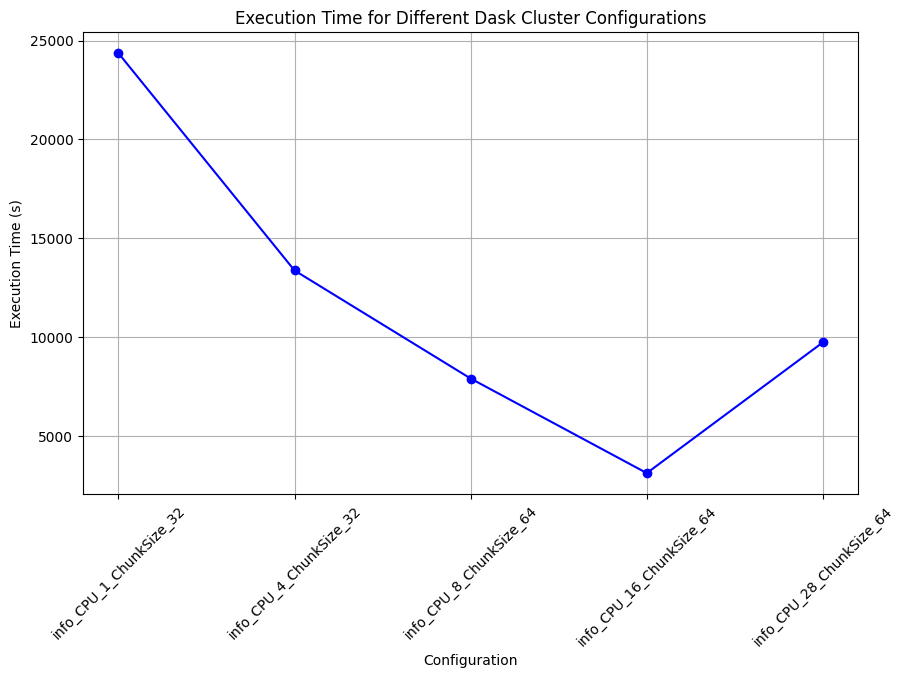

In [23]:
# plot the execution time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.loc['execution_time'], marker='o', color='b')
plt.xlabel('Configuration')
# tilt the x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylabel('Execution Time (s)')
plt.title('Execution Time for Different Dask Cluster Configurations')
plt.grid(True)
plt.show()


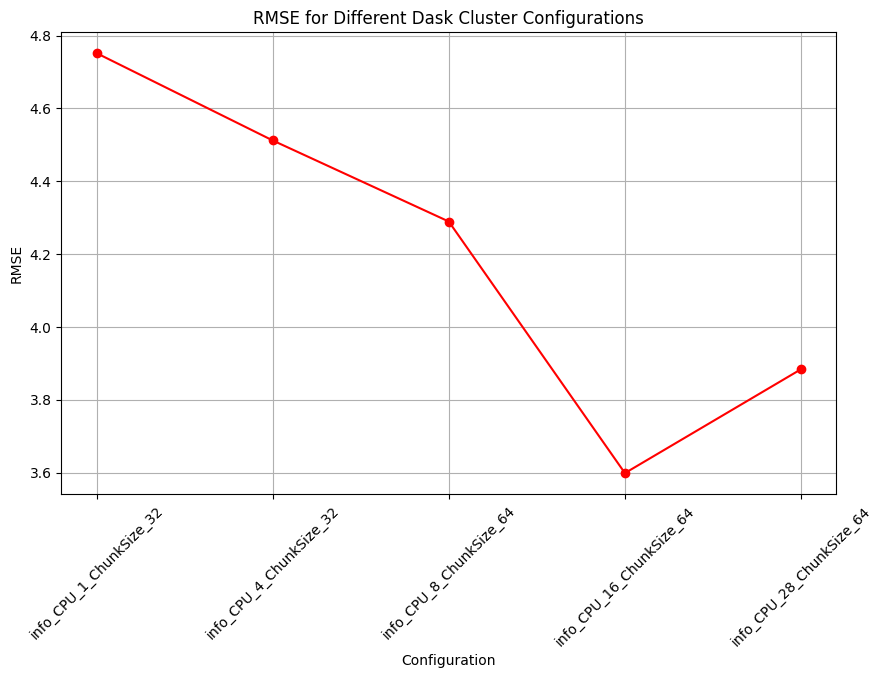

In [24]:

# plot the RMSE
plt.figure(figsize=(10, 6))
plt.plot(df.loc['rmse'], marker='o', color='r')
plt.xlabel('Configuration')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.title('RMSE for Different Dask Cluster Configurations')
plt.grid(True)
plt.show()


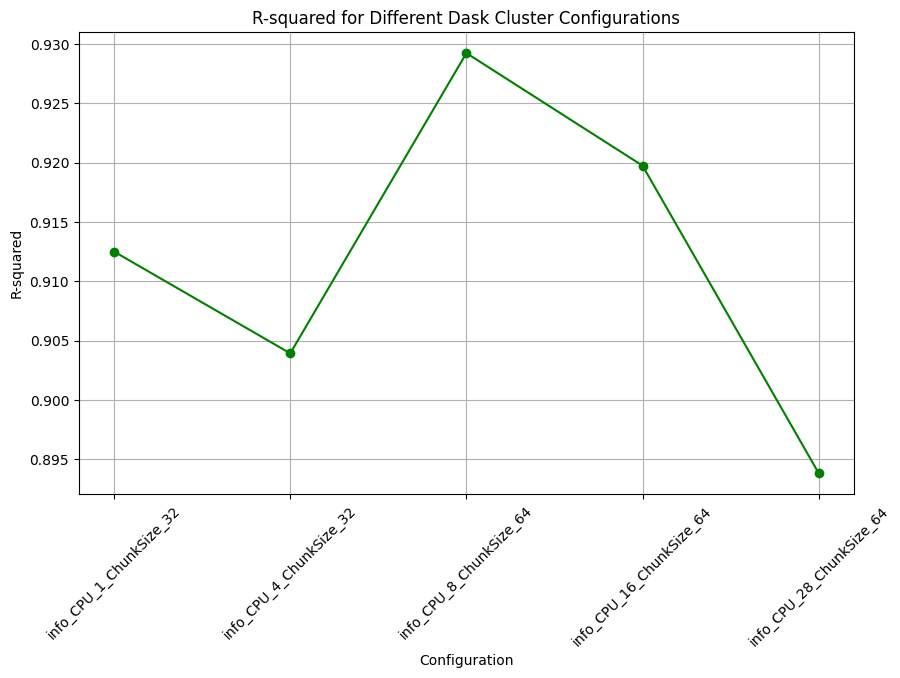

In [25]:

# plot the R-squared
plt.figure(figsize=(10, 6))
plt.plot(df.loc['r2'], marker='o', color='g')
plt.xlabel('Configuration')
plt.xticks(rotation=45)
plt.ylabel('R-squared')
plt.title('R-squared for Different Dask Cluster Configurations')
plt.grid(True)
plt.show()


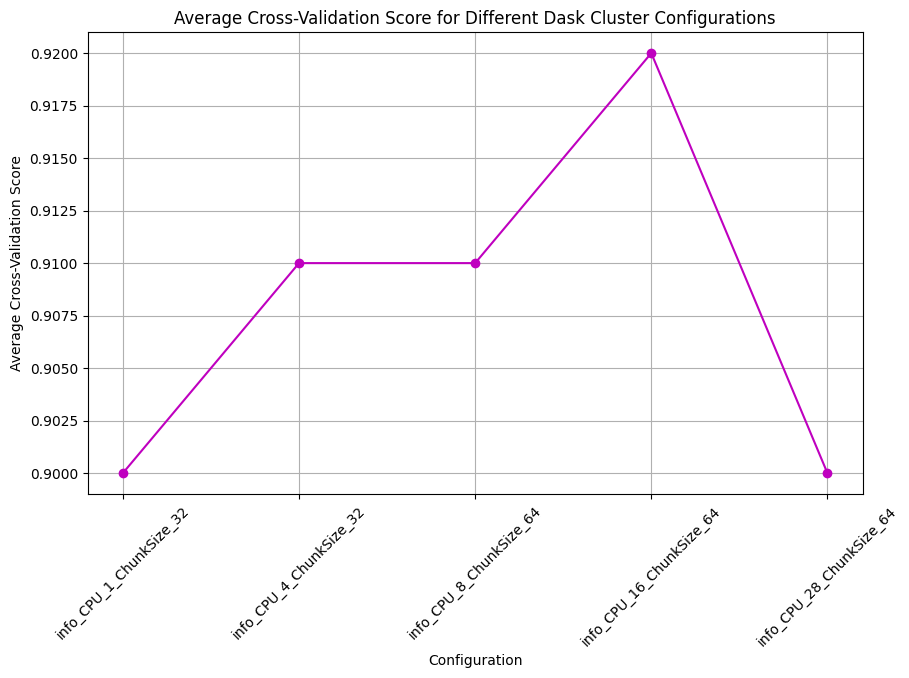

In [26]:

# plot the average cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(df.loc['average_score'], marker='o', color='m')
plt.xlabel('Configuration')
plt.xticks(rotation=45)
plt.ylabel('Average Cross-Validation Score')
plt.title('Average Cross-Validation Score for Different Dask Cluster Configurations')
plt.grid(True)
plt.show()


## <a id='toc1_10_'></a>[Speedup & Efficiency Calculation](#toc0_)

To calculate the efficiency:

Efficiency = Speedup / # of CPUs


where:

Speedup = Wall-clock time of serial execution/ Wall-clock time of parallel execution


we need to identify the wall-clock time of serial execution and then use it to calculate the speedup for each parallel execution configuration in your DataFrame. After that, we can compute the efficiency for each case.

The wall-clock time of serial execution is typically the execution time when only one CPU and one thread are used, which appears to be in your 'info_CPU_1_ChunkSize_32' column.

Let's proceed with the calculation of speedup and efficiency for each column. I'll perform the calculations based on the data from your uploaded image.

Here are the calculated values for speedup and efficiency for each CPU configuration:

- For 1 CPU: 
  - Speedup: 1.000 (This is the baseline for serial execution)
  - Efficiency: 1.000

- For 4 CPUs: 
  - Speedup: 1.821
  - Efficiency: 0.455

- For 8 CPUs: 
  - Speedup: 3.076
  - Efficiency: 0.384

- For 16 CPUs: 
  - Speedup: 7.754
  - Efficiency: 0.485

- For 28 CPUs: 
  - Speedup: 2.499
  - Efficiency: 0.089

It looks like the speedup increases as we add more CPUs up to 16, but then it drops when we go to 28 CPUs, which is also reflected in a decrease in efficiency. This could be due to overhead from managing more CPUs or other bottlenecks in the system that prevent it from scaling linearly.

### <a id='toc1_10_1_'></a>[Speedup Plot & Efficiency Plot](#toc0_)

In [38]:
# Transpose the DataFrame to get the correct structure
df = pd.DataFrame(analysis_results).T

# Calculate the speedup and efficiency
serial_time = df.loc['info_CPU_1_ChunkSize_32', 'execution_time']
df['speedup'] = serial_time / df['execution_time']
df['efficiency'] = df['speedup'] / df['total_cpus']

df[['execution_time', 'total_cpus', 'speedup', 'efficiency']]

# ignore the first row as it is the serial execution
df = df.iloc[1:]
df

,execution_time,total_cpus,total_threads,rmse,r2,cross_val_scores,average_score,speedup,efficiency
info_CPU_4_ChunkSize_32,13381.882612,4,1,4.512109,0.903937,"[0.92, 0.93, 0.94, 0.93, 0.92]",0.91,1.820653,0.455163
info_CPU_8_ChunkSize_64,7921.219024,8,1,4.289373,0.92923,"[0.92, 0.92, 0.93, 0.91, 0.9]",0.91,3.07576,0.38447
info_CPU_16_ChunkSize_64,3142.222963,16,1,3.598363,0.919747,"[0.9, 0.91, 0.92, 0.93, 0.91]",0.92,7.753672,0.484604
info_CPU_28_ChunkSize_64,9750.416663,28,1,3.883726,0.893847,"[0.89, 0.9, 0.9, 0.89, 0.92]",0.9,2.498741,0.089241


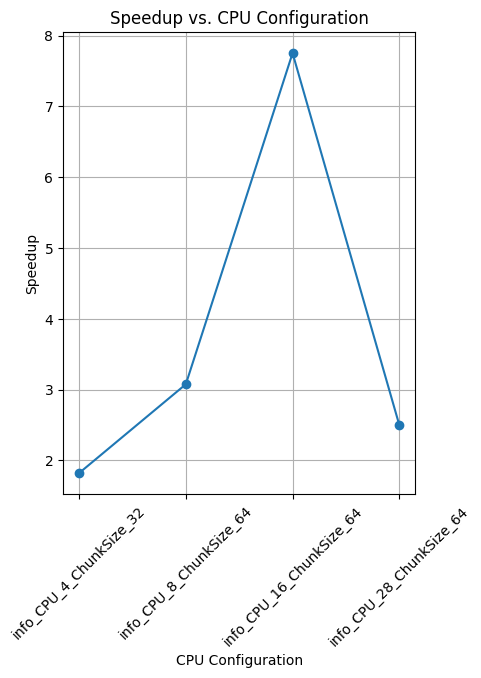

In [39]:
plt.figure(figsize=(10, 6))
# Plot Speedup
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(df.index, df['speedup'], marker='o')
plt.title('Speedup vs. CPU Configuration')
plt.xlabel('CPU Configuration')
plt.ylabel('Speedup')
plt.xticks(rotation=45) # Rotate the x-axis labels to fit better
plt.grid(True)
plt.show()


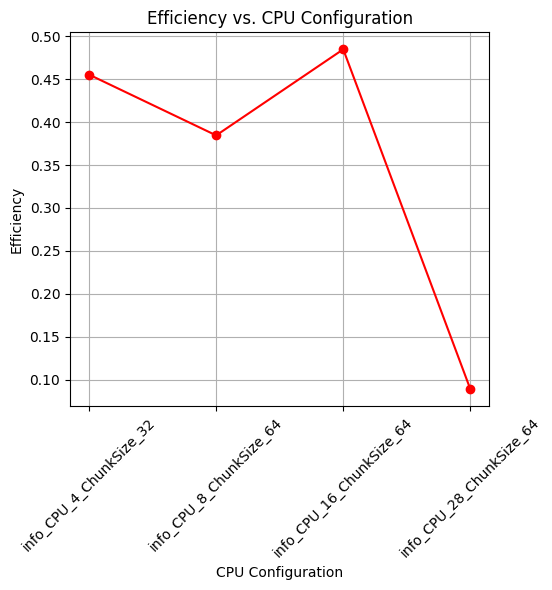

In [40]:

plt.figure(figsize=(10, 6))
# Plot Efficiency
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(df.index, df['efficiency'], marker='o', color='red')
plt.title('Efficiency vs. CPU Configuration')
plt.xlabel('CPU Configuration')
plt.ylabel('Efficiency')
plt.xticks(rotation=45) # Rotate the x-axis labels to fit better
plt.grid(True)

# Adjust the layout so that the plots fit well
plt.tight_layout()

plt.show()
